    Ano     Semana  Casos
0  2014  Semana 01   4633
1  2014  Semana 02   6137
2  2014  Semana 03   6960
3  2014  Semana 04   8350
4  2014  Semana 05   9583
Index(['Ano', 'Semana', 'Casos'], dtype='object')
Acurácia do modelo Random Forest: 0.0
Acurácia do modelo Gradient Boosting: 0.010526315789473684


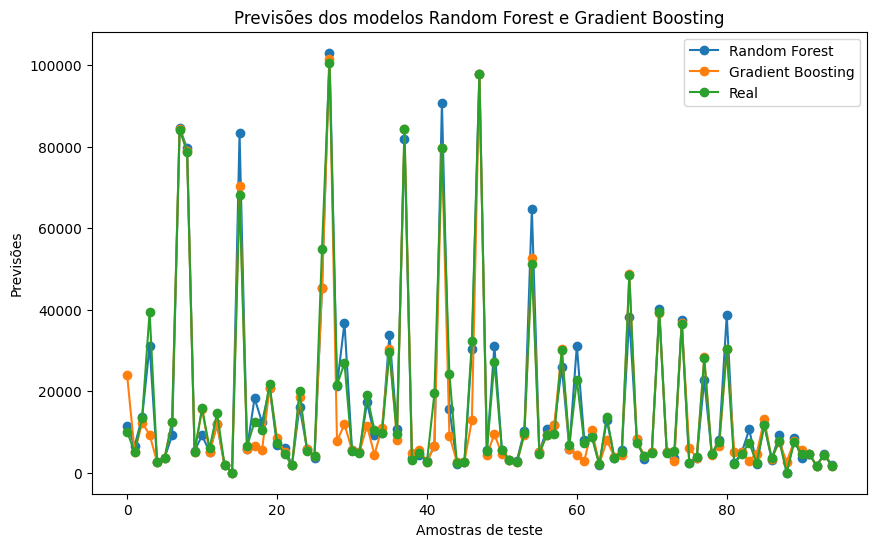

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar os dados
data = pd.read_csv('/content/casos_notificados.csv')

# Verificar os nomes das colunas
print(data.head())
print(data.columns)

# Pré-processamento dos dados
label_encoder = LabelEncoder()
data['Ano'] = label_encoder.fit_transform(data['Ano'])
data['Semana'] = label_encoder.fit_transform(data['Semana'])

# Separar os dados em treino e teste
X = data[['Ano', 'Semana', 'Casos']]
y = data['Casos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Treinar o modelo Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Fazer previsões
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Avaliar a precisão do modelo
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print(f"Acurácia do modelo Random Forest: {rf_accuracy}")
print(f"Acurácia do modelo Gradient Boosting: {gb_accuracy}")

# Criar gráfico de linha com as previsões
plt.figure(figsize=(10, 6))

plt.plot(range(len(rf_predictions)), rf_predictions, 'o-', label='Random Forest')
plt.plot(range(len(gb_predictions)), gb_predictions, 'o-', label='Gradient Boosting')
plt.plot(range(len(y_test)), y_test, 'o-', label='Real')  # Line for the real data

plt.xlabel('Amostras de teste')
plt.ylabel('Previsões')
plt.title('Previsões dos modelos Random Forest e Gradient Boosting')
plt.legend()
plt.show()
